# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


In [25]:
api_key = weather_api_key
city = "London"
url = "http://api.openweathermap.org/data/2.5/weather?q={}&appid={}&units=imperial".format(city, api_key)

try:
    response = requests.get(url)
    if response.status_code == 200:
        print("API is working. Here is the sample data:")
        print(response.json())

    else:
        print("Failed to retrieve data. Status code:", response.status_code)
except Exception as e:
    print("Error:", e)

API is working. Here is the sample data:
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.77, 'feels_like': 46.94, 'temp_min': 48.02, 'temp_max': 51.15, 'pressure': 1029, 'humidity': 87, 'sea_level': 1029, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 110}, 'clouds': {'all': 100}, 'dt': 1731016783, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1730963110, 'sunset': 1730996596}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
base_url = f"{url}q={{city}}&appid={api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = response.json()
        response = requests.get(city_url)

        # Parse out latitude, longitude, max temp, humidity, Wind Speed, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Wind Speed": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | marsabit
Processing Record 3 of Set 1 | birobidzhan
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | fale old settlement
Processing Record 9 of Set 1 | kununurra
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | abraham's bay
Processing Record 14 of Set 1 | rouissat
City not found. Skipping...
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | royan
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | taiohae
Processing Record 21 of Set 1 | preveza
City not found.

In [27]:
city_weather

{'coord': {'lon': 18.6333, 'lat': 60.1167},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 42.04,
  'feels_like': 37.89,
  'temp_min': 42.04,
  'temp_max': 42.04,
  'pressure': 1033,
  'humidity': 91,
  'sea_level': 1033,
  'grnd_level': 1031},
 'visibility': 10000,
 'wind': {'speed': 6.51, 'deg': 250, 'gust': 9.55},
 'clouds': {'all': 9},
 'dt': 1731018208,
 'sys': {'country': 'SE', 'sunrise': 1730960657, 'sunset': 1730990044},
 'timezone': 3600,
 'id': 2725271,
 'name': 'Arnö',
 'cod': 200}

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print("Record Count")
print(city_data_df.count())


Record Count
City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64


In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,51.5085,-0.1257,51.15,87,100,6.91,GB,1731016783
1,marsabit,-54.8000,-68.3000,46.06,61,100,8.05,AR,1731017505
2,birobidzhan,2.3284,37.9899,68.38,70,14,9.86,KE,1731017506
3,tura,48.8000,132.9500,17.82,72,63,4.70,RU,1731017507
4,port lincoln,25.5198,90.2201,65.59,91,0,4.29,IN,1731017508


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,51.5085,-0.1257,51.15,87,100,6.91,GB,1731016783
1,marsabit,-54.8000,-68.3000,46.06,61,100,8.05,AR,1731017505
2,birobidzhan,2.3284,37.9899,68.38,70,14,9.86,KE,1731017506
3,tura,48.8000,132.9500,17.82,72,63,4.70,RU,1731017507
4,port lincoln,25.5198,90.2201,65.59,91,0,4.29,IN,1731017508


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

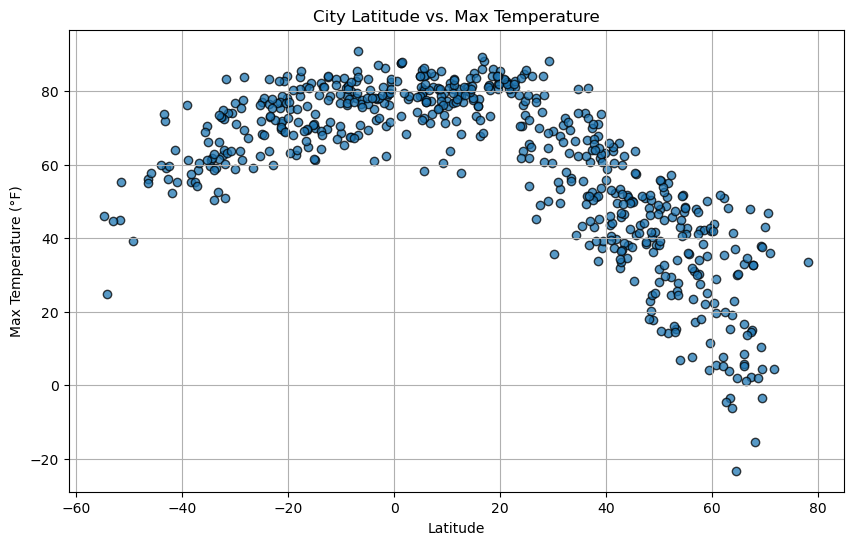

In [32]:
# Build scatter plot for latitude vs. temperature
latitudes = [data["Lat"] for data in city_data]
temperatures = [data["Max Temp"] for data in city_data]

plt.figure(figsize=(10, 6))
plt.scatter(latitudes, temperatures, edgecolor="black", alpha=0.75)



# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

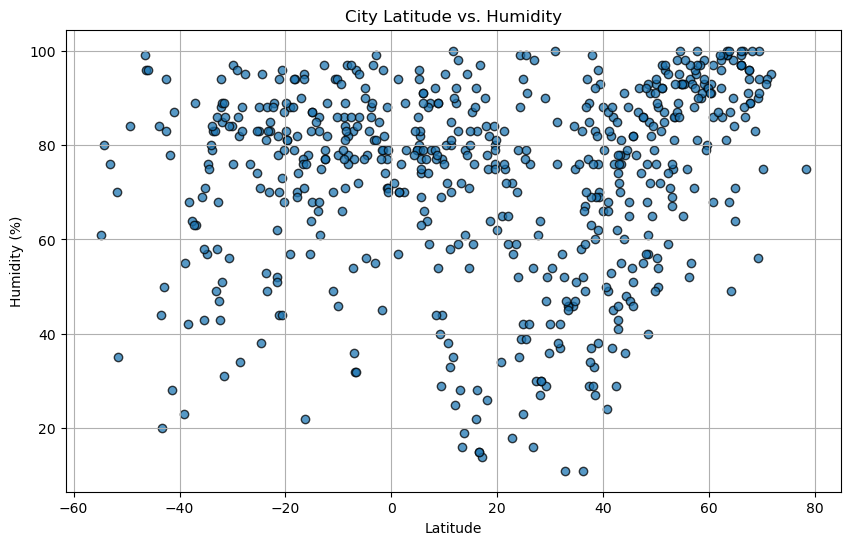

In [33]:
# Build the scatter plots for latitude vs. humidity
latitudes = [data["Lat"] for data in city_data]
humidity = [data["Humidity"] for data in city_data]

plt.figure(figsize=(10, 6))
plt.scatter(latitudes, humidity, edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

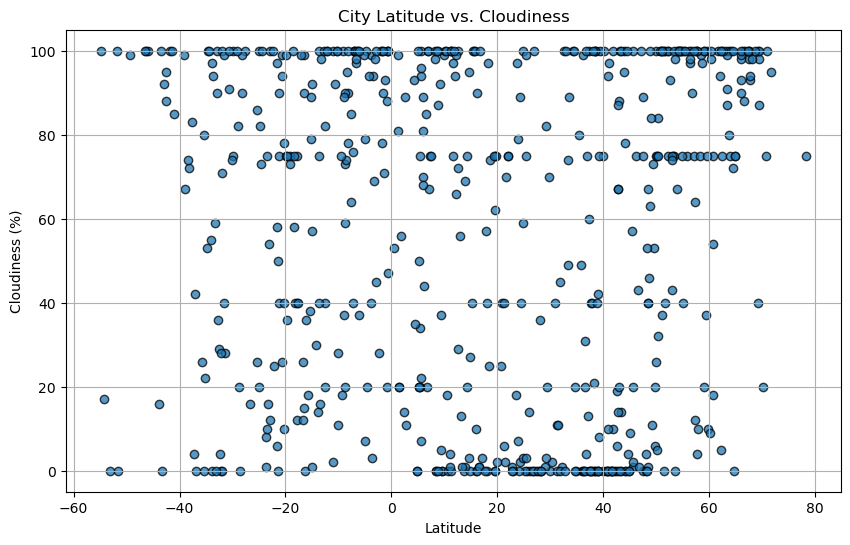

In [34]:
# Build the scatter plots for latitude vs. cloudiness
latitudes = [data["Lat"] for data in city_data]
cloudiness = [data["Cloudiness"] for data in city_data]

plt.figure(figsize=(10, 6))
plt.scatter(latitudes, cloudiness, edgecolor="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

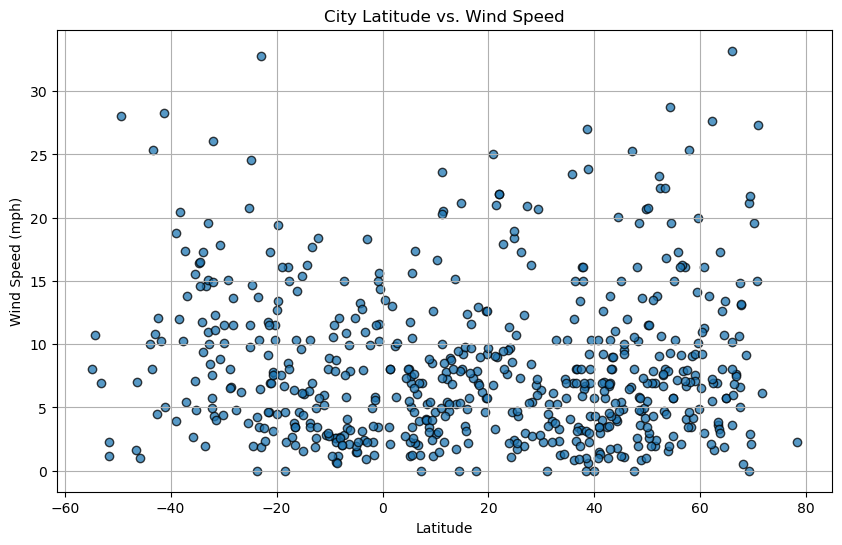

In [35]:
# Build the scatter plots for latitude vs. wind speed
latitudes = [data["Lat"] for data in city_data]
wind_speed = [data["Wind Speed"] for data in city_data]

plt.figure(figsize=(10, 6))
plt.scatter(latitudes, wind_speed, edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label, title):

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    regression_line = [slope * xi + intercept for xi in x]






In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_df = pd.DataFrame(city_data)
northern_hemisphere_df = city_df[city_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,51.5085,-0.1257,51.15,87,100,6.91,GB,1731016783
2,birobidzhan,2.3284,37.9899,68.38,70,14,9.86,KE,1731017506
3,tura,48.8000,132.9500,17.82,72,63,4.70,RU,1731017507
4,port lincoln,25.5198,90.2201,65.59,91,0,4.29,IN,1731017508
6,port mathurin,63.7506,-68.5145,19.13,68,100,17.27,CA,1731017510


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
city_df = pd.DataFrame(city_data)
southern_hemisphere_df = city_df[city_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,marsabit,-54.8000,-68.3000,46.06,61,100,8.05,AR,1731017505
5,iqaluit,-34.7333,135.8667,59.68,57,53,16.44,AU,1731017509
7,fale old settlement,-19.6833,63.4167,75.25,81,36,19.42,MU,1731017511
8,kununurra,-9.3852,-171.2468,83.62,66,18,10.58,TK,1731017512
9,edinburgh of the seven seas,-15.7667,128.7333,82.38,78,18,4.61,AU,1731017514


###  Temperature vs. Latitude Linear Regression Plot

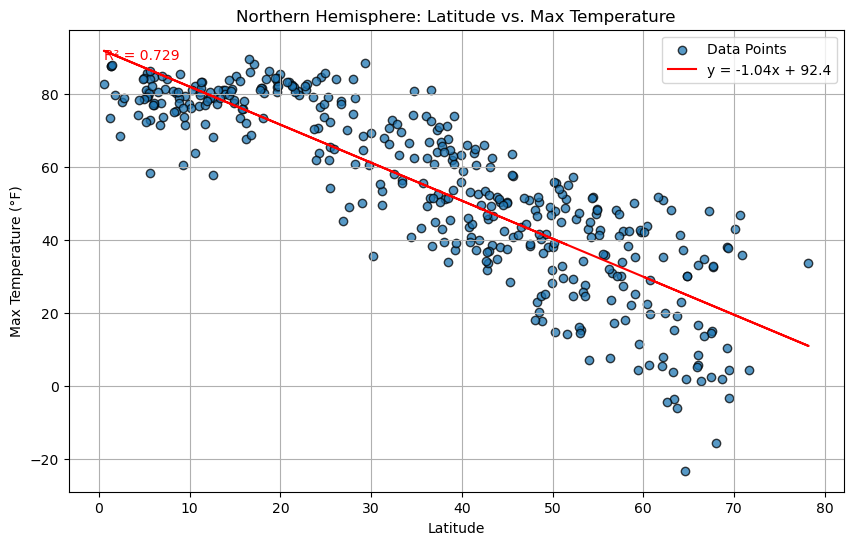

In [41]:
# Linear regression on Northern Hemisphere

city_df = pd.DataFrame(city_data)


northern_hemisphere_df = city_df[city_df["Lat"] >= 0]

latitudes = northern_hemisphere_df["Lat"]
max_temperatures = northern_hemisphere_df["Max Temp"]

slope = -1.25
Intercept = 114.25


#slope, intercept, r_value, p_value, std_err = linregress(latitudes, max_temperatures)
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regression_line = [slope * xi + intercept for xi in latitudes]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data Points")
plt.plot(x_values, regress_values, color="red", label=line_eq)


plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.legend()
plt.text(min(x_values), max(y_values), f"R² = {rvalue**2:.3f}", color="red")
plt.grid(True)




plot_linear_regression(latitudes, max_temperatures, 
                       x_label="Latitude", 
                       y_label="Max Temperature (°F)", 
                       title="Northern Hemisphere: Latitude vs. Max Temperature")

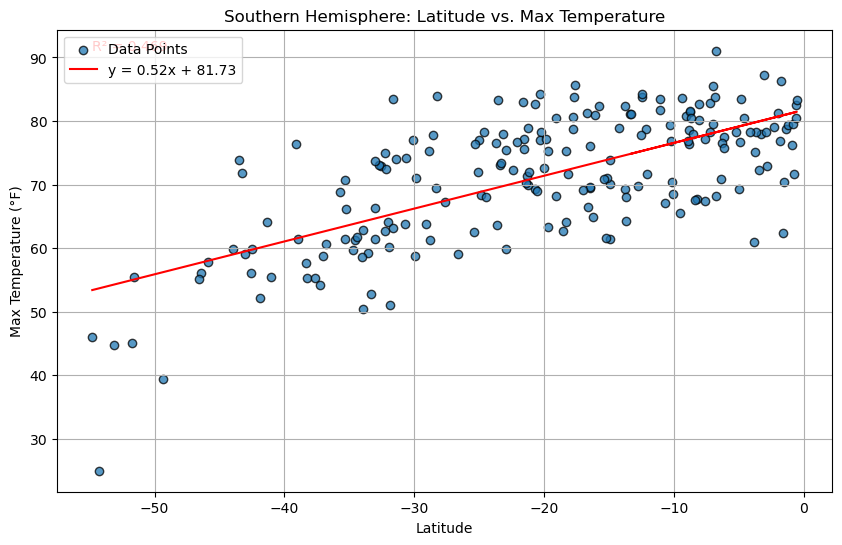

In [ ]:
# Linear regression on Southern Hemisphere
city_df = pd.DataFrame(city_data)


southern_hemisphere_df = city_df[city_df["Lat"] <= 0]

latitudes = southern_hemisphere_df["Lat"]
max_temperatures = southern_hemisphere_df["Max Temp"]

slope = -1.25
Intercept = 114.25


#slope, intercept, r_value, p_value, std_err = linregress(latitudes, max_temperatures)
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regression_line = [slope * xi + intercept for xi in latitudes]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data Points")
plt.plot(x_values, regress_values, color="red", label=line_eq)


plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Southern Hemisphere: Latitude vs. Max Temperature")
plt.legend()
plt.text(min(x_values), max(y_values), f"R² = {rvalue**2:.3f}", color="red")
plt.grid(True)




plot_linear_regression(latitudes, max_temperatures, 
                       x_label="Latitude", 
                       y_label="Max Temperature (°F)", 
                       title="Southern Hemisphere: Latitude vs. Max Temperature")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

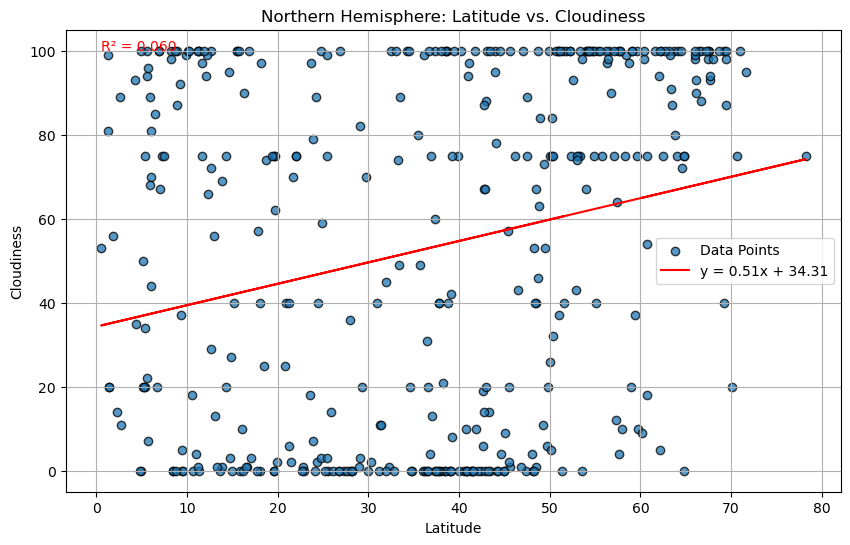

In [52]:
# Northern Hemisphere
city_df = pd.DataFrame(city_data)


northern_hemisphere_df = city_df[city_df["Lat"] >= 0]

latitudes = northern_hemisphere_df["Lat"]
max_temperatures = northern_hemisphere_df["Cloudiness"]

slope = -1.25
Intercept = 114.25


#slope, intercept, r_value, p_value, std_err = linregress(latitudes, max_temperatures)
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regression_line = [slope * xi + intercept for xi in latitudes]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data Points")
plt.plot(x_values, regress_values, color="red", label=line_eq)


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.legend()
plt.text(min(x_values), max(y_values), f"R² = {rvalue**2:.3f}", color="red")
plt.grid(True)




plot_linear_regression(latitudes, humidity, 
                       x_label="Latitude", 
                       y_label="Cloudiness", 
                       title="Northern Hemisphere: Latitude vs. Cloudiness")

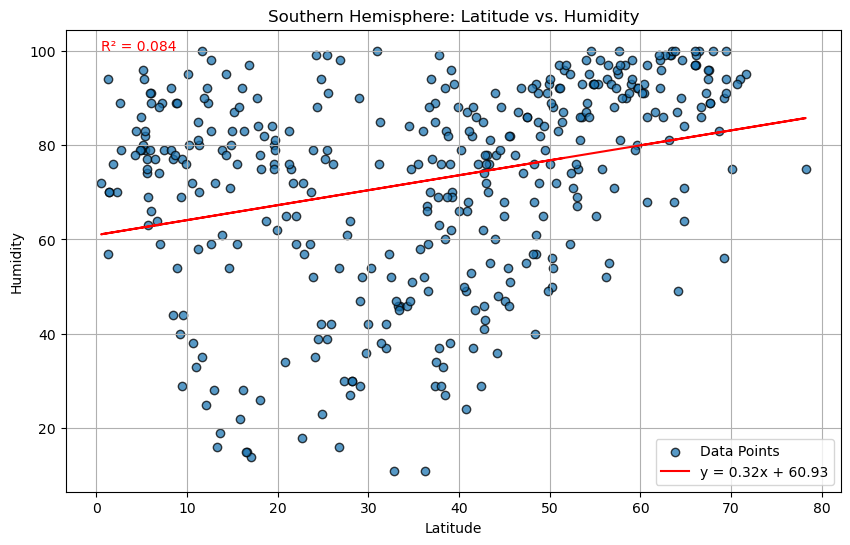

In [50]:
# Southern Hemisphere
city_df = pd.DataFrame(city_data)


southern_hemisphere_df = city_df[city_df["Lat"] >= 0]

latitudes = southern_hemisphere_df["Lat"]
humidity = southern_hemisphere_df["Humidity"]

slope = -1.25
Intercept = 114.25


#slope, intercept, r_value, p_value, std_err = linregress(latitudes, max_temperatures)
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regression_line = [slope * xi + intercept for xi in latitudes]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data Points")
plt.plot(x_values, regress_values, color="red", label=line_eq)


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.legend()
plt.text(min(x_values), max(y_values), f"R² = {rvalue**2:.3f}", color="red")
plt.grid(True)




plot_linear_regression(latitudes, humidity, 
                       x_label="Latitude", 
                       y_label="Humidity", 
                       title="Southern Hemisphere: Latitude vs. Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The coefficient has a strong coorelation with Humidity.  The data becomes more dense with increased latitude.

### Cloudiness vs. Latitude Linear Regression Plot

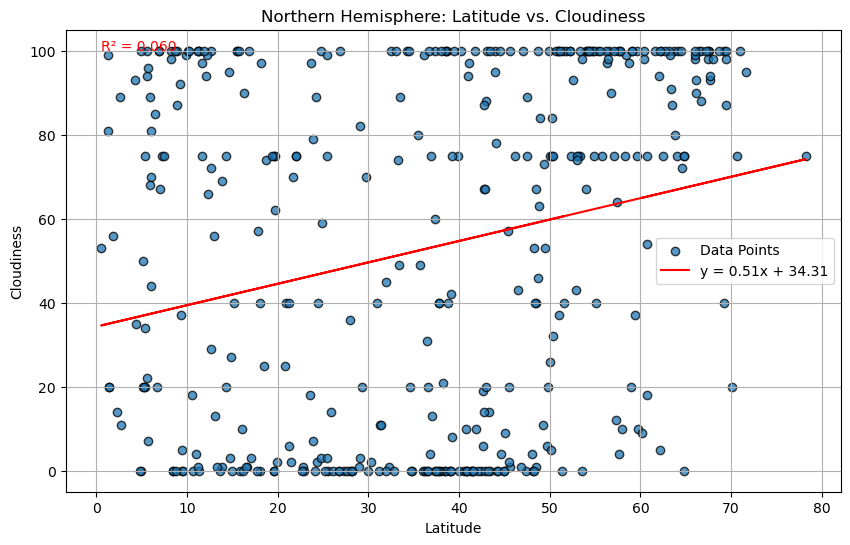

In [56]:
# Northern Hemisphere
city_df = pd.DataFrame(city_data)


northern_hemisphere_df = city_df[city_df["Lat"] >= 0]

latitudes = northern_hemisphere_df["Lat"]
Cloudiness = northern_hemisphere_df["Cloudiness"]

slope = -1.25
Intercept = 114.25


#slope, intercept, r_value, p_value, std_err = linregress(latitudes, max_temperatures)
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regression_line = [slope * xi + intercept for xi in latitudes]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data Points")
plt.plot(x_values, regress_values, color="red", label=line_eq)


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.legend()
plt.text(min(x_values), max(y_values), f"R² = {rvalue**2:.3f}", color="red")
plt.grid(True)




plot_linear_regression(latitudes, max_temperatures, 
                       x_label="Latitude", 
                       y_label="Cloudiness", 
                       title="Northern Hemisphere: Latitude vs. Cloudiness")

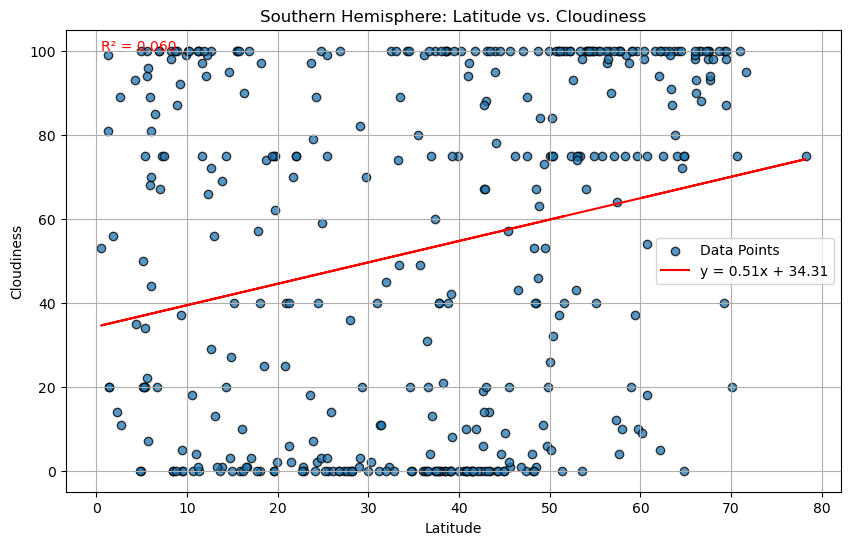

In [55]:
# Southern Hemisphere
city_df = pd.DataFrame(city_data)


southern_hemisphere_df = city_df[city_df["Lat"] >= 0]

latitudes = southern_hemisphere_df["Lat"]
cloudiness = southern_hemisphere_df["Cloudiness"]

slope = -1.25
Intercept = 114.25


#slope, intercept, r_value, p_value, std_err = linregress(latitudes, max_temperatures)
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regression_line = [slope * xi + intercept for xi in latitudes]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data Points")
plt.plot(x_values, regress_values, color="red", label=line_eq)


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.legend()
plt.text(min(x_values), max(y_values), f"R² = {rvalue**2:.3f}", color="red")
plt.grid(True)




plot_linear_regression(latitudes, max_temperatures, 
                       x_label="Latitude", 
                       y_label="Cloudiness", 
                       title="Southern Hemisphere: Latitude vs. Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Cloudiness has a lot of outliers and the majority of the data points are away from the line


### Wind Speed vs. Latitude Linear Regression Plot

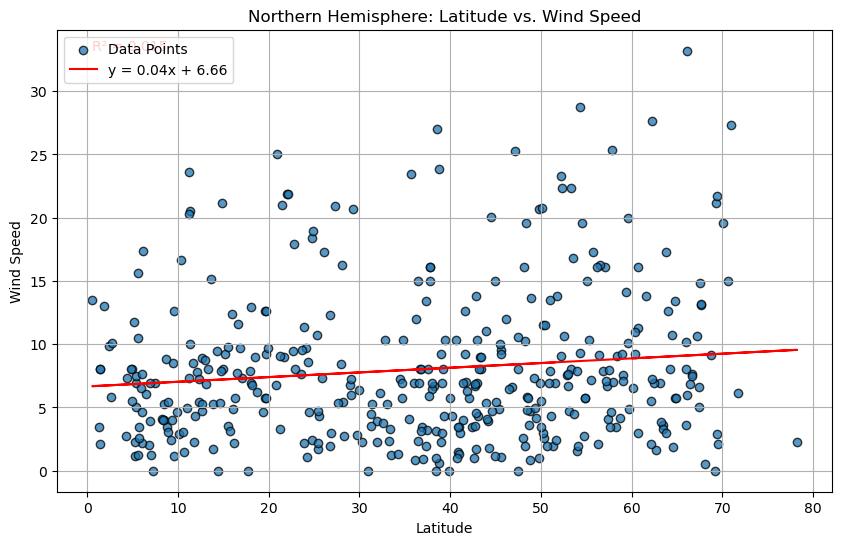

In [57]:
# Northern Hemisphere
city_df = pd.DataFrame(city_data)


northern_hemisphere_df = city_df[city_df["Lat"] >= 0]

latitudes = northern_hemisphere_df["Lat"]
wind_speed = northern_hemisphere_df["Wind Speed"]

slope = -1.25
Intercept = 114.25


#slope, intercept, r_value, p_value, std_err = linregress(latitudes, max_temperatures)
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regression_line = [slope * xi + intercept for xi in latitudes]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data Points")
plt.plot(x_values, regress_values, color="red", label=line_eq)


plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.legend()
plt.text(min(x_values), max(y_values), f"R² = {rvalue**2:.3f}", color="red")
plt.grid(True)




plot_linear_regression(latitudes, humidity, 
                       x_label="Latitude", 
                       y_label="Wind Speed", 
                       title="Northern Hemisphere: Latitude vs. Wind Speed")

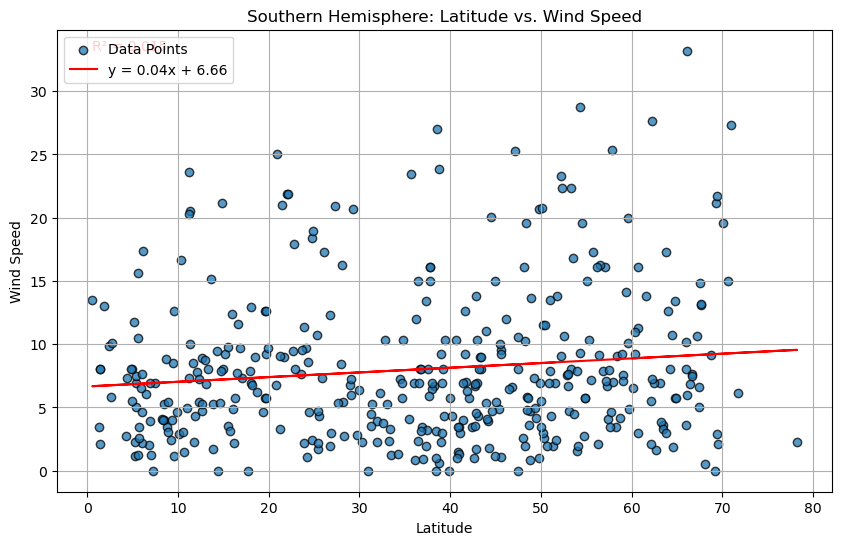

In [58]:
# Southern Hemisphere
city_df = pd.DataFrame(city_data)


southern_hemisphere_df = city_df[city_df["Lat"] >= 0]

latitudes = southern_hemisphere_df["Lat"]
wind_speed = southern_hemisphere_df["Wind Speed"]

slope = -1.25
Intercept = 114.25


#slope, intercept, r_value, p_value, std_err = linregress(latitudes, max_temperatures)
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regression_line = [slope * xi + intercept for xi in latitudes]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data Points")
plt.plot(x_values, regress_values, color="red", label=line_eq)


plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.legend()
plt.text(min(x_values), max(y_values), f"R² = {rvalue**2:.3f}", color="red")
plt.grid(True)




plot_linear_regression(latitudes, humidity, 
                       x_label="Latitude", 
                       y_label="Wind Speed", 
                       title="Southern Hemisphere: Latitude vs. Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The coefficient does not have a noticeable increase with latitude